In [3]:
## https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data
## K means clustering

In [4]:
import pandas as pd
df = pd.read_csv('acs2017_county_data.csv')
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [5]:
# df2 = df.dropna() No nulls for county level census data here.
# edit: missed 'child poverty' having a null/catch it later tho
print(df.shape)
df.info()

(3220, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3220 non-null   int64  
 1   State             3220 non-null   object 
 2   County            3220 non-null   object 
 3   TotalPop          3220 non-null   int64  
 4   Men               3220 non-null   int64  
 5   Women             3220 non-null   int64  
 6   Hispanic          3220 non-null   float64
 7   White             3220 non-null   float64
 8   Black             3220 non-null   float64
 9   Native            3220 non-null   float64
 10  Asian             3220 non-null   float64
 11  Pacific           3220 non-null   float64
 12  VotingAgeCitizen  3220 non-null   int64  
 13  Income            3220 non-null   int64  
 14  IncomeErr         3220 non-null   int64  
 15  IncomePerCap      3220 non-null   int64  
 16  IncomePerCapErr   3220 non-null

In [6]:
pd.set_option('display.max_columns', None) ## show all columns
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [7]:
df2 = df.drop(['CountyId'], axis=1, inplace=False) ## don't care about countid, just name
df2.columns = df2.columns.str.lower()

In [8]:
## 1955 countries
print(df2.county.nunique())
df2.head()

1955


,state,county,totalpop,men,women,hispanic,white,black,native,asian,pacific,votingagecitizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment
0,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [9]:
## drop state/county so we only have numeric data
df_num = df2.drop(['state','county'], axis=1, inplace=False)
## Tokens for later to tie back to clusters
counties = df2[['state','county']]
df_num.head()

,totalpop,men,women,hispanic,white,black,native,asian,pacific,votingagecitizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment
0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


/tmp/ipykernel_3837/1975963374.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

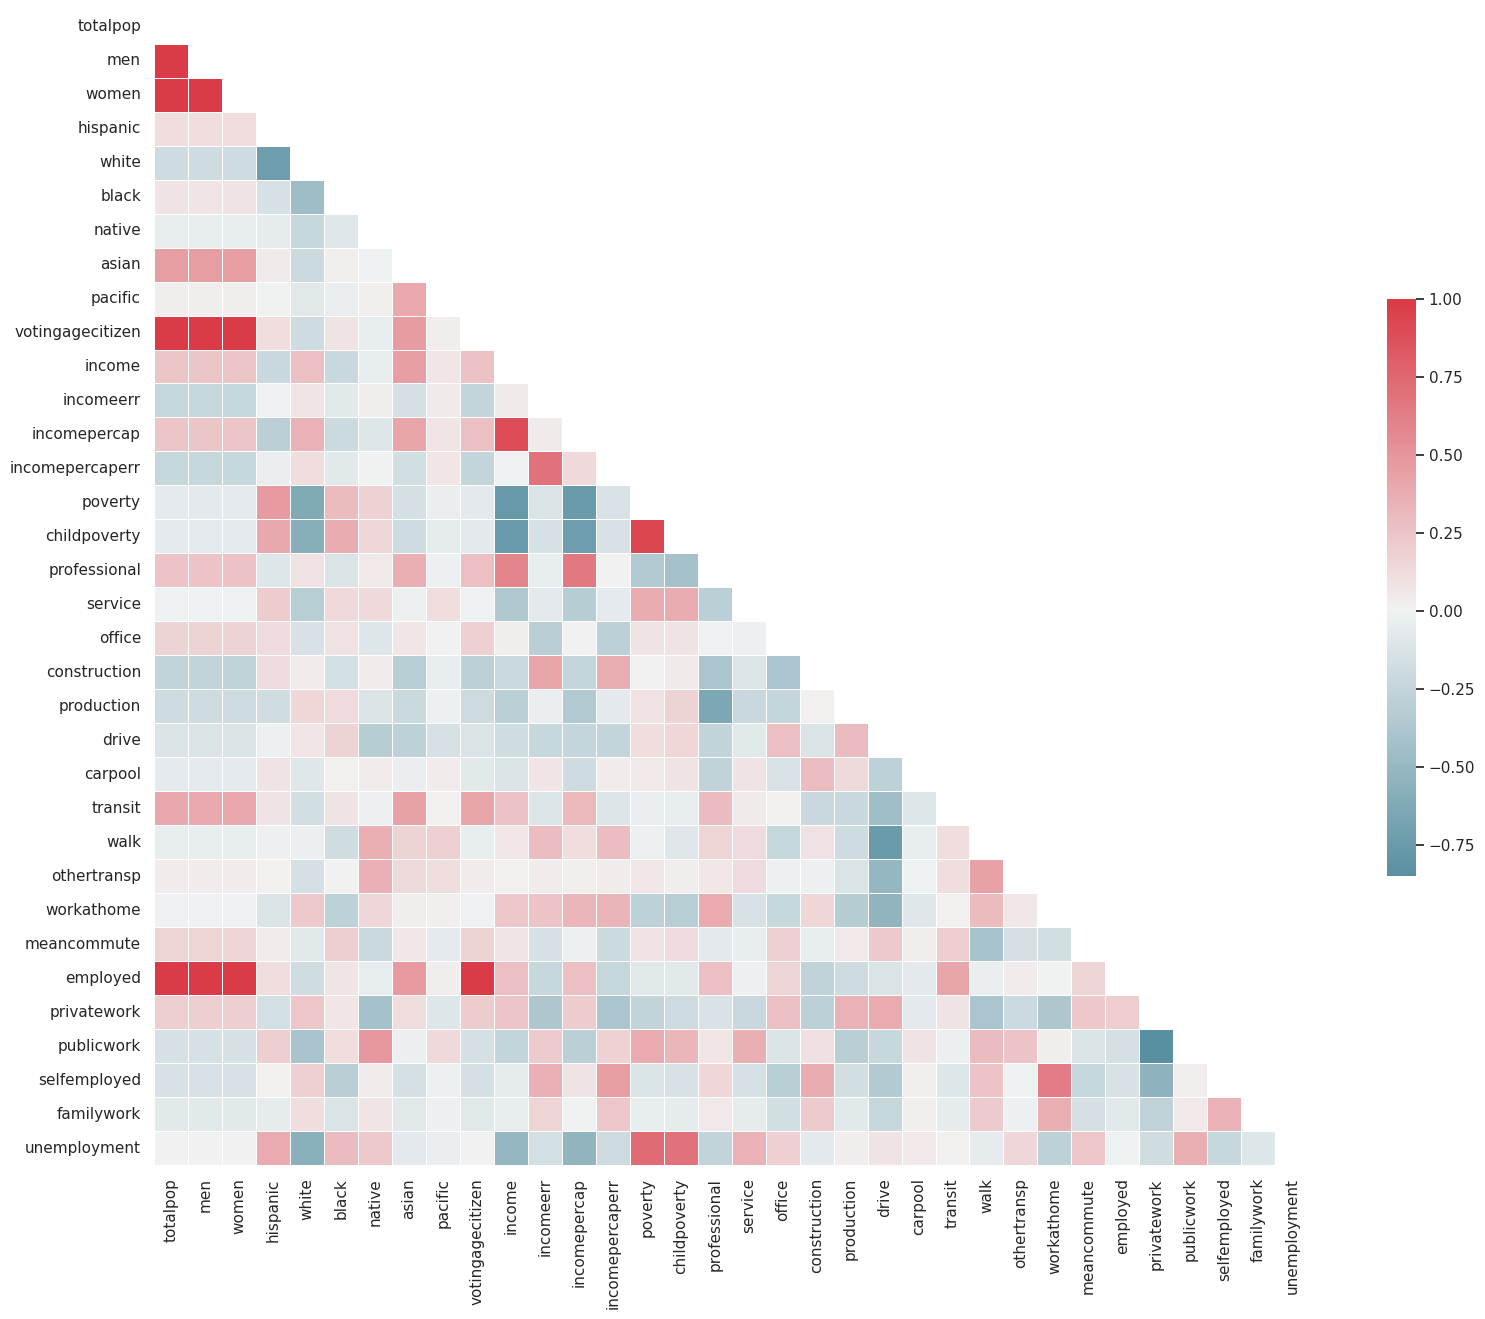

In [10]:
## Just curious about corelation

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_num.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
## We don't NEED to remove correlated vars, just redundant info, but might use some PCA to restrict them a bit. 
## Not going to here, would rather keep it more interpretable.

array([[<AxesSubplot:title={'center':'totalpop'}>,
        <AxesSubplot:title={'center':'men'}>,
        <AxesSubplot:title={'center':'women'}>,
        <AxesSubplot:title={'center':'hispanic'}>,
        <AxesSubplot:title={'center':'white'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'native'}>,
        <AxesSubplot:title={'center':'asian'}>,
        <AxesSubplot:title={'center':'pacific'}>,
        <AxesSubplot:title={'center':'votingagecitizen'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'incomeerr'}>],
       [<AxesSubplot:title={'center':'incomepercap'}>,
        <AxesSubplot:title={'center':'incomepercaperr'}>,
        <AxesSubplot:title={'center':'poverty'}>,
        <AxesSubplot:title={'center':'childpoverty'}>,
        <AxesSubplot:title={'center':'professional'}>,
        <AxesSubplot:title={'center':'service'}>],
       [<AxesSubplot:title={'center':'office'}>,
        <AxesSubplot:title

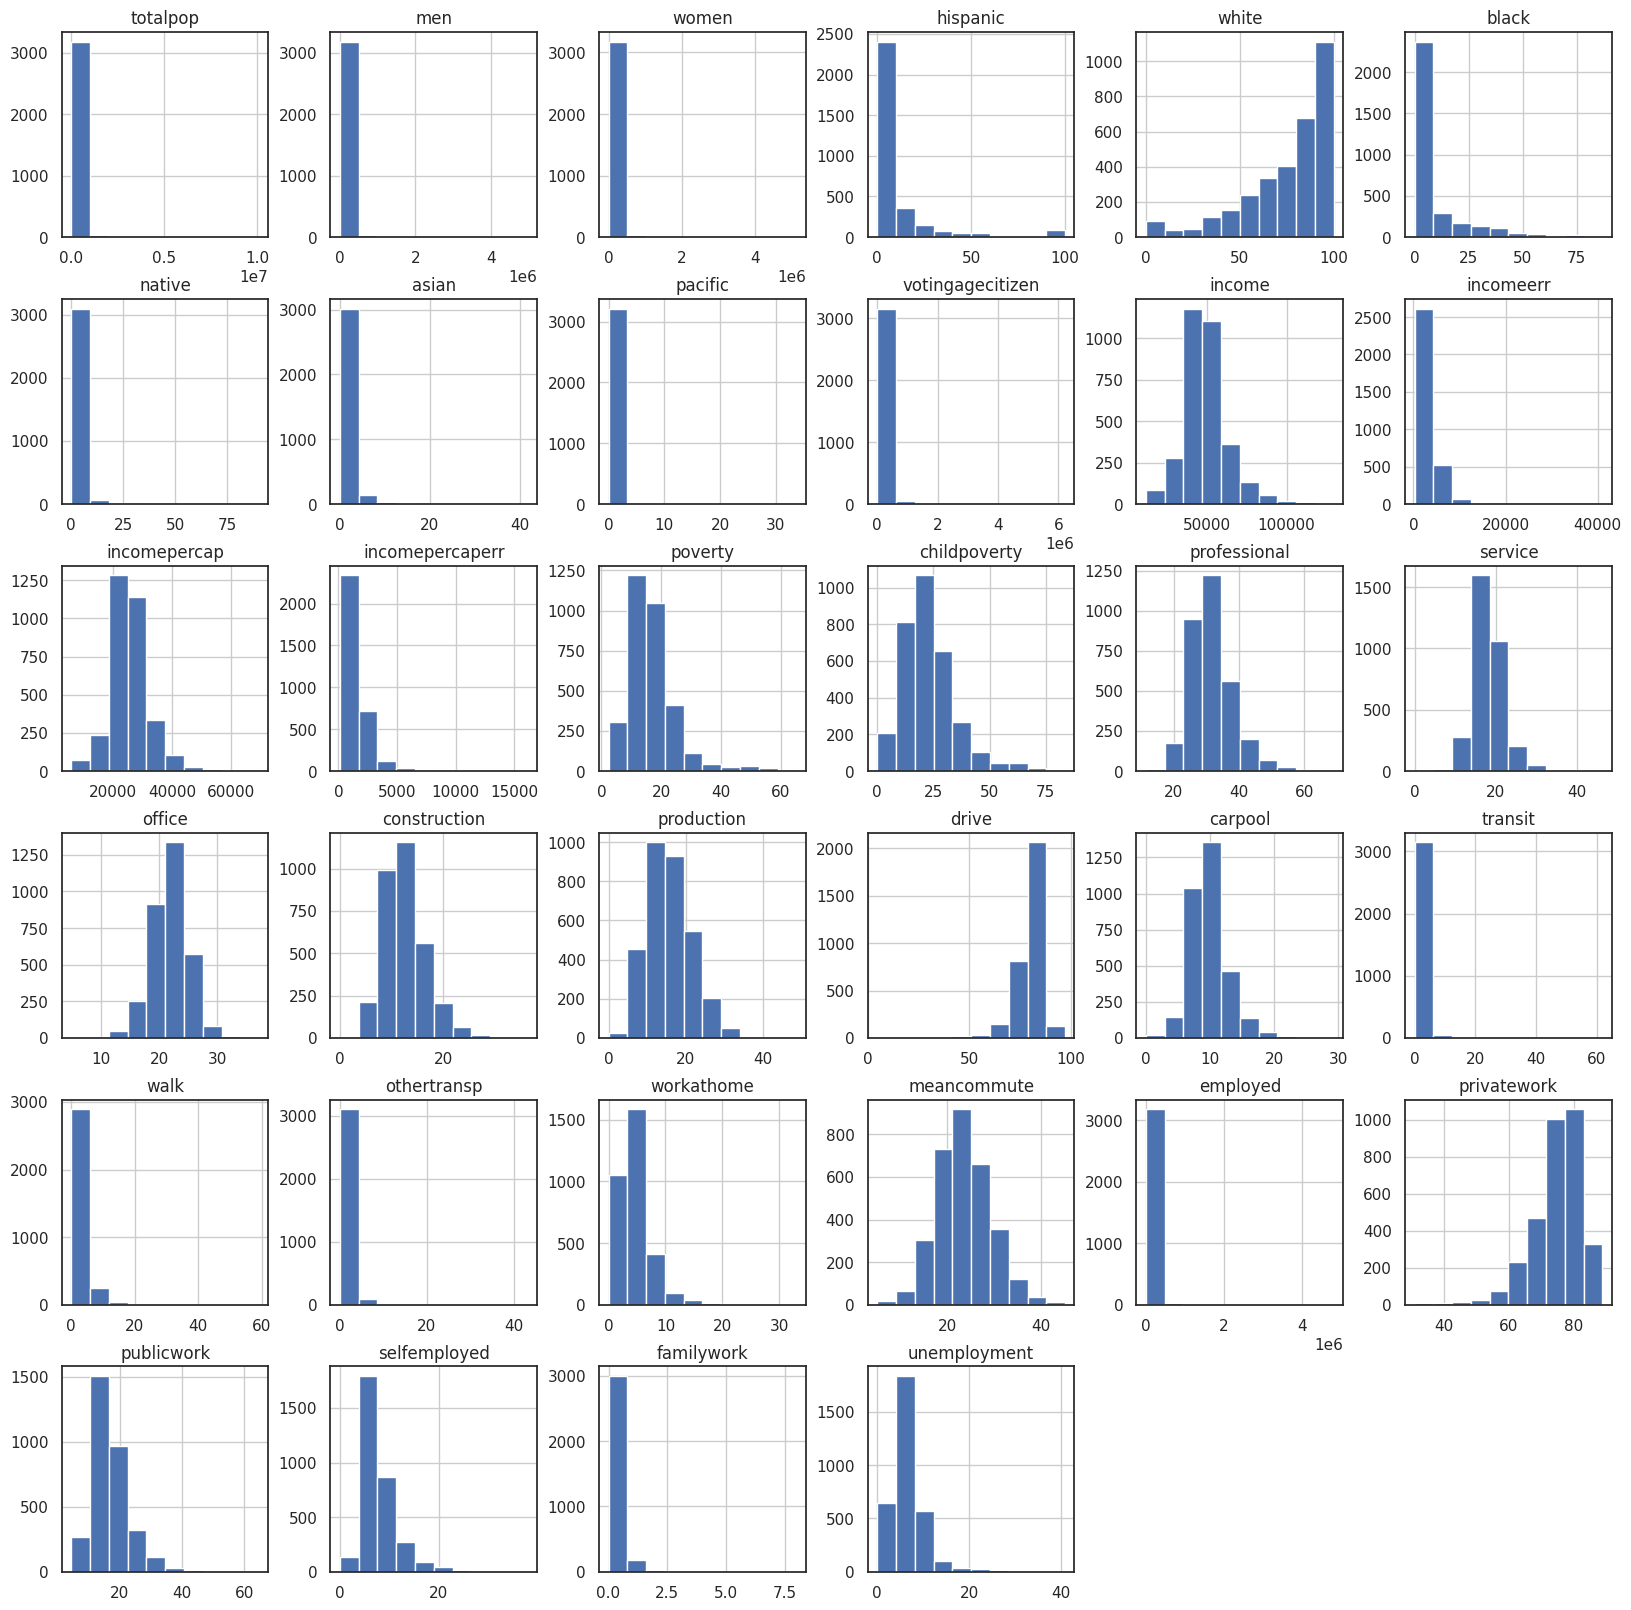

In [12]:
df_num.hist(figsize=(20,20))

In [13]:
## Normalize data (mean, to get mean of 0, range of -1 to 1)

df_norm = round((df_num - df_num.mean()) / (df_num.max() - df_num.min()),3)
df_norm.head()
#dfn_c = df_norm.dropna(axis=1,how='any')

,totalpop,men,women,hispanic,white,black,native,asian,pacific,votingagecitizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment
0,-0.005,-0.005,-0.004,-0.086,0.005,0.118,-0.016,-0.009,-0.002,-0.005,0.054,-0.007,0.034,0.032,-0.049,-0.035,0.066,-0.005,0.041,-0.123,-0.009,0.069,-0.009,-0.014,-0.045,-0.007,-0.068,0.058,-0.005,-0.013,0.052,-0.057,-0.022,-0.036
1,0.010,0.010,0.010,-0.069,0.082,0.009,-0.011,-0.014,-0.002,0.014,0.030,-0.044,0.058,-0.049,-0.079,-0.083,0.073,-0.000,0.115,-0.079,-0.103,0.055,-0.077,-0.014,-0.041,-0.012,0.026,0.088,0.009,0.101,-0.069,-0.039,-0.022,-0.028
2,-0.007,-0.007,-0.008,-0.071,-0.292,0.450,-0.017,-0.016,-0.002,-0.008,-0.133,-0.014,-0.127,-0.045,0.166,0.261,-0.112,-0.030,0.022,-0.030,0.170,0.041,0.043,-0.010,-0.018,0.002,-0.104,-0.002,-0.008,-0.013,0.033,-0.033,0.003,0.140
3,-0.008,-0.007,-0.008,-0.089,-0.003,0.153,-0.015,-0.031,-0.002,-0.009,-0.047,0.007,-0.075,0.023,-0.025,0.043,-0.123,-0.013,-0.067,0.091,0.135,0.073,-0.012,-0.004,-0.050,0.002,-0.098,0.163,-0.008,0.020,0.005,-0.039,0.003,0.038
4,-0.004,-0.004,-0.004,-0.023,0.125,-0.083,-0.016,-0.028,-0.002,-0.005,-0.013,-0.012,-0.057,-0.041,-0.019,0.028,-0.052,-0.115,0.044,0.088,0.075,0.077,0.012,-0.014,-0.048,-0.028,-0.080,0.288,-0.005,0.157,-0.086,-0.099,-0.022,-0.043


array([[<AxesSubplot:title={'center':'totalpop'}>,
        <AxesSubplot:title={'center':'men'}>,
        <AxesSubplot:title={'center':'women'}>,
        <AxesSubplot:title={'center':'hispanic'}>,
        <AxesSubplot:title={'center':'white'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'native'}>,
        <AxesSubplot:title={'center':'asian'}>,
        <AxesSubplot:title={'center':'pacific'}>,
        <AxesSubplot:title={'center':'votingagecitizen'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'incomeerr'}>],
       [<AxesSubplot:title={'center':'incomepercap'}>,
        <AxesSubplot:title={'center':'incomepercaperr'}>,
        <AxesSubplot:title={'center':'poverty'}>,
        <AxesSubplot:title={'center':'childpoverty'}>,
        <AxesSubplot:title={'center':'professional'}>,
        <AxesSubplot:title={'center':'service'}>],
       [<AxesSubplot:title={'center':'office'}>,
        <AxesSubplot:title

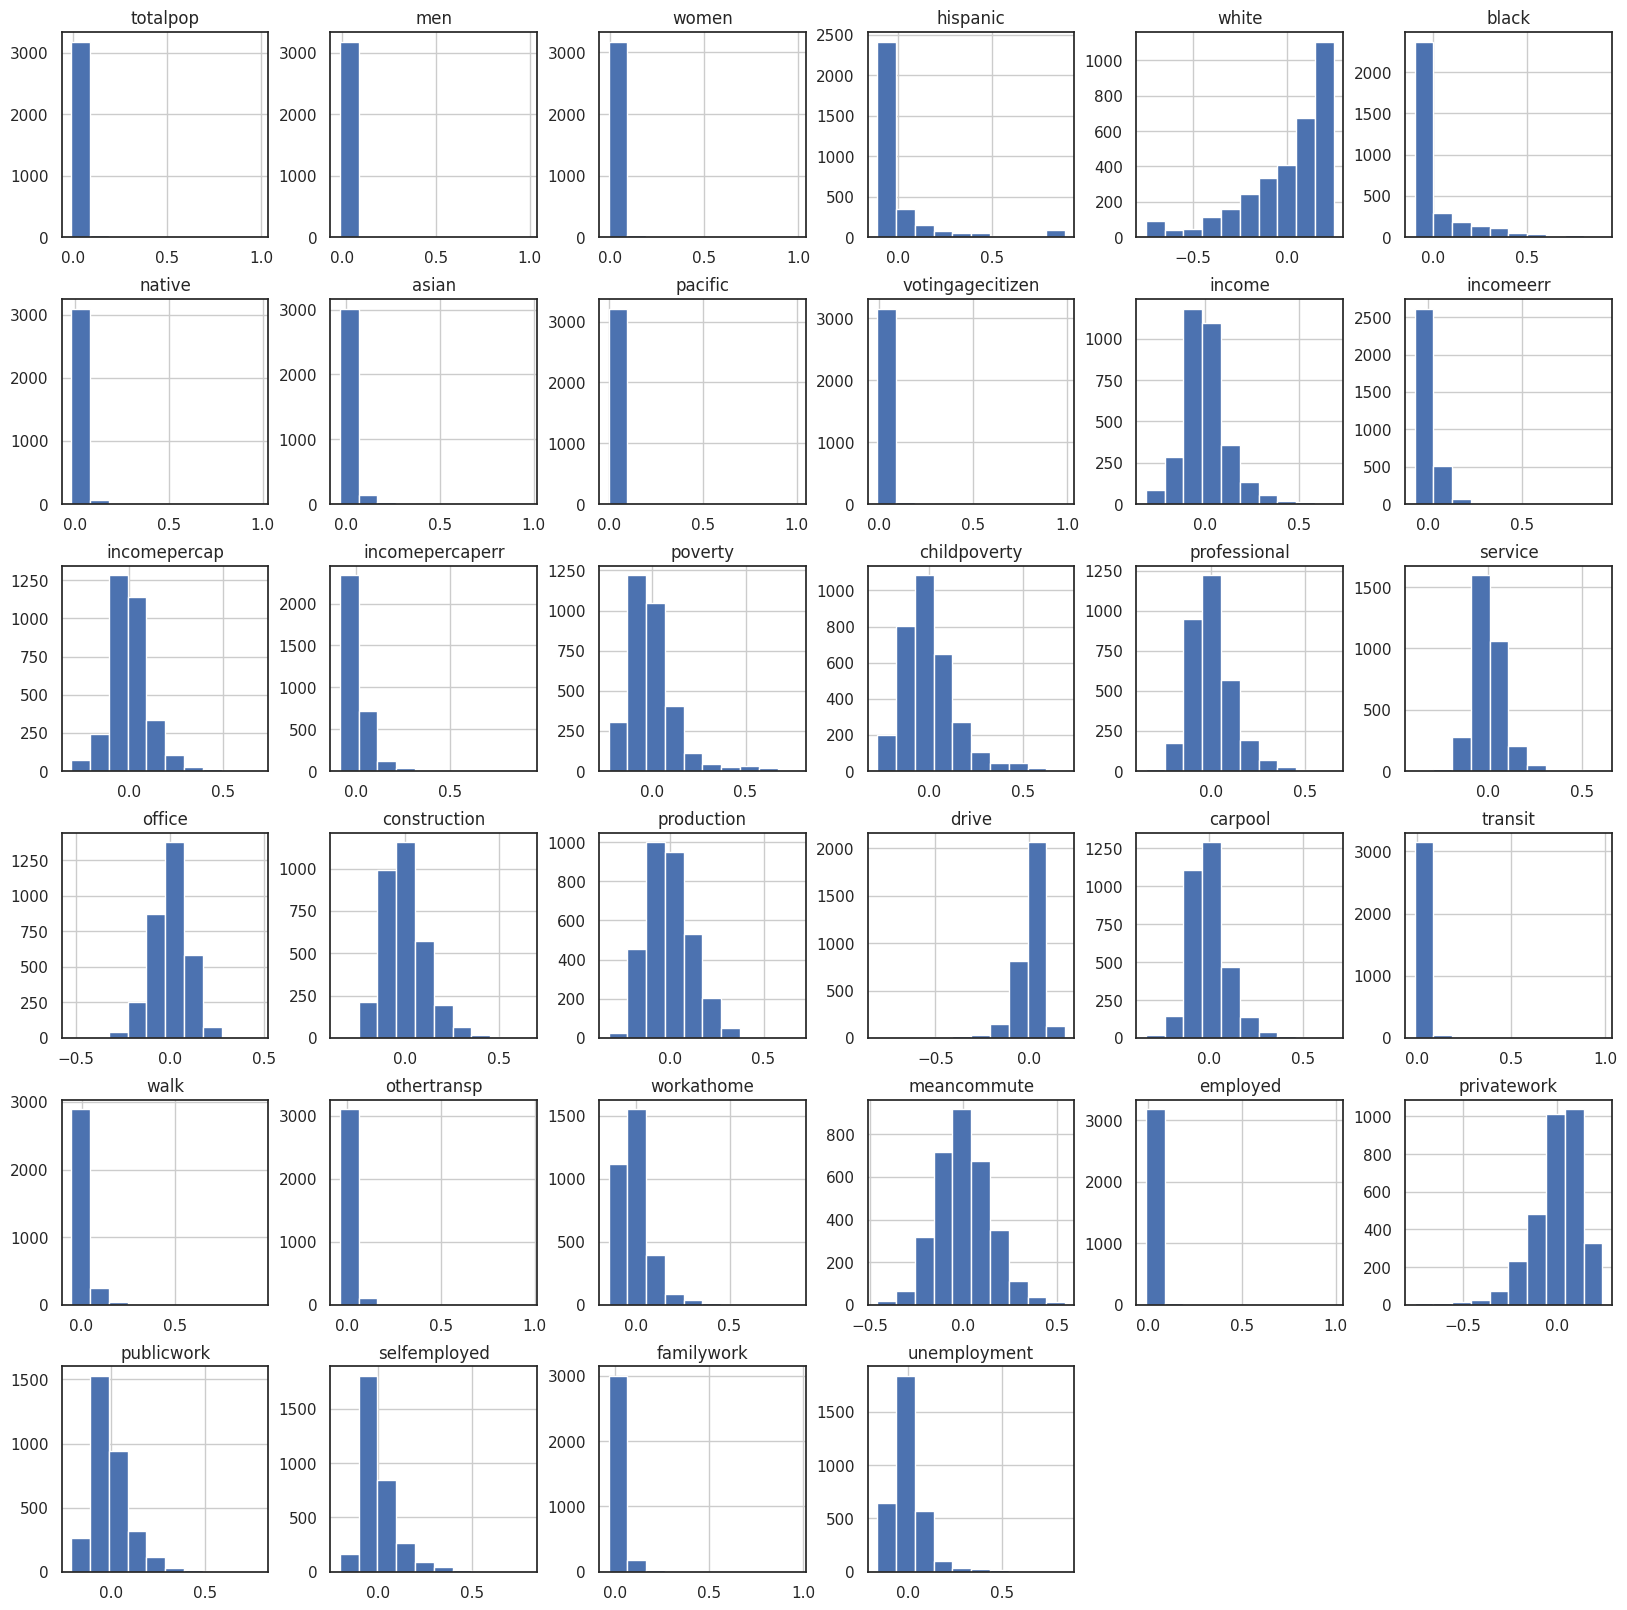

In [14]:
## Might want to do some feature engineering, like % men (instead of men,women counts)
df_norm.hist(figsize=(20,20))

In [15]:
## So weird, 1 NAN
## Checking isnull() didn't catch it...
np.isnan(df_norm).sum()

totalpop            0
men                 0
women               0
hispanic            0
white               0
black               0
native              0
asian               0
pacific             0
votingagecitizen    0
income              0
incomeerr           0
incomepercap        0
incomepercaperr     0
poverty             0
childpoverty        1
professional        0
service             0
office              0
construction        0
production          0
drive               0
carpool             0
transit             0
walk                0
othertransp         0
workathome          0
meancommute         0
employed            0
privatework         0
publicwork          0
selfemployed        0
familywork          0
unemployment        0
dtype: int64

In [16]:
# Method to do for all
# mean_values = df_norm.mean()
# df_norm_filled = df_norm.fillna(mean_values)

print(df_norm[np.isnan(df_norm['childpoverty'])]['childpoverty'])
df_norm_copy = df_norm.copy()
df_norm_copy.loc[np.isnan(df_norm_copy['childpoverty']), 'childpoverty'] = df_norm_copy['childpoverty'].mean() ## set to mean
print("{:.10f}".format(df_norm_copy['childpoverty'].mean()))
print(df_norm_copy[np.isnan(df_norm['childpoverty'])]['childpoverty']) ## confirm 
#df_norm_copy.head()

548   NaN
Name: childpoverty, dtype: float64
0.0000043492
548    0.000004
Name: childpoverty, dtype: float64


In [17]:
# Don't need to random sample for 'elbow' test bc only 3K rows here, but that is often useful to speed this up.
#dfelbow = df_norm.sample(n=10000)
from sklearn.cluster import KMeans

# Naively picking 2 clusters to see if this works
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_norm_copy)

# Sample output of cluster assignments
kmeans.labels_[1:50]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0], dtype=int32)

In [18]:
# Elbow method from https://gist.github.com/calippo/20a147e657ee5e8d8666
# pick where you start to get diminishing value for additional clusters (ie if this was an arm, where the elbow is)

# Paste in the function
def elbow(df, n):
    kMeansVar = [KMeans(n_clusters=k, random_state=0).fit(df.values) for k in range(1, n)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()

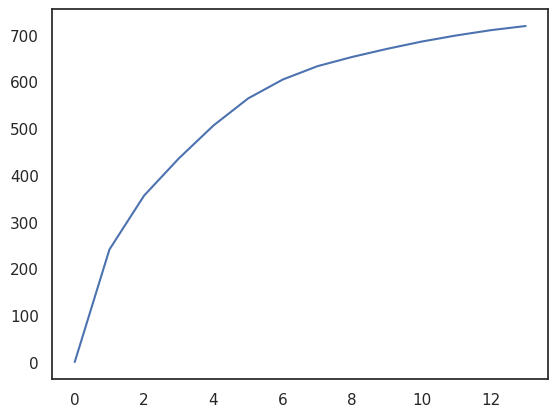

None


In [19]:
## Sample of Data
from scipy.spatial.distance import cdist, pdist
print(elbow(df_norm_copy, 15))

In [20]:
## Looks like diminishing returns after 5-9 clusters or so (Judgement call though as it's pretty smooth).
## I would err on the side of fewer clusters unless there's more we want to distinguish/a reason to do more

In [21]:
num_clusters = 5

In [22]:
kmeans_c = KMeans(n_clusters=num_clusters, random_state=0).fit(df_norm_copy)

In [23]:
print(kmeans_c.labels_.dtype)

int32


In [24]:
from collections import Counter
## Showing cluster sizes
print(Counter(kmeans_c.labels_))

Counter({4: 1488, 2: 620, 0: 520, 3: 470, 1: 122})


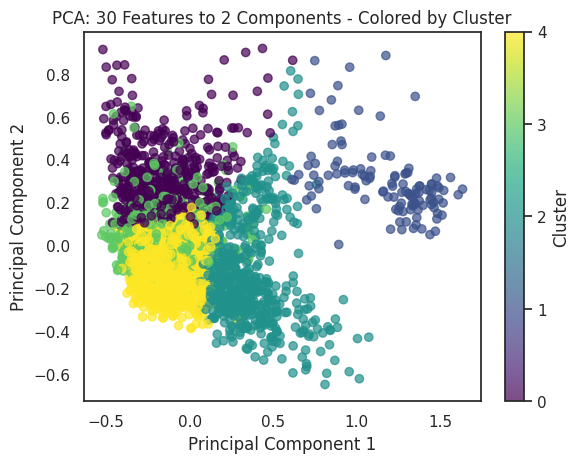

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Applying PCA to reduce to 2 components, just for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_norm_copy)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=pca_result, columns=['Principal_Component_1', 'Principal_Component_2'])
df_pca['Cluster'] = kmeans_c.labels_

# Plotting the PCA results with different colors for each cluster
plt.scatter(
    df_pca['Principal_Component_1'],
    df_pca['Principal_Component_2'],
    c=df_pca['Cluster'],  # Use 'Cluster' column for color
    cmap='viridis',
    alpha=0.7
)
plt.title('PCA: 30 Features to 2 Components - Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=range(kmeans_c.n_clusters), label='Cluster')
plt.show()

In [26]:
normalized_df_labeled = df_norm_copy
normalized_df_labeled['cluster'] = kmeans_c.labels_
print(normalized_df_labeled.shape)
normalized_df_labeled.head()

(3220, 35)


,totalpop,men,women,hispanic,white,black,native,asian,pacific,votingagecitizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment,cluster
0,-0.005,-0.005,-0.004,-0.086,0.005,0.118,-0.016,-0.009,-0.002,-0.005,0.054,-0.007,0.034,0.032,-0.049,-0.035,0.066,-0.005,0.041,-0.123,-0.009,0.069,-0.009,-0.014,-0.045,-0.007,-0.068,0.058,-0.005,-0.013,0.052,-0.057,-0.022,-0.036,4
1,0.010,0.010,0.010,-0.069,0.082,0.009,-0.011,-0.014,-0.002,0.014,0.030,-0.044,0.058,-0.049,-0.079,-0.083,0.073,-0.000,0.115,-0.079,-0.103,0.055,-0.077,-0.014,-0.041,-0.012,0.026,0.088,0.009,0.101,-0.069,-0.039,-0.022,-0.028,3
2,-0.007,-0.007,-0.008,-0.071,-0.292,0.450,-0.017,-0.016,-0.002,-0.008,-0.133,-0.014,-0.127,-0.045,0.166,0.261,-0.112,-0.030,0.022,-0.030,0.170,0.041,0.043,-0.010,-0.018,0.002,-0.104,-0.002,-0.008,-0.013,0.033,-0.033,0.003,0.140,2
3,-0.008,-0.007,-0.008,-0.089,-0.003,0.153,-0.015,-0.031,-0.002,-0.009,-0.047,0.007,-0.075,0.023,-0.025,0.043,-0.123,-0.013,-0.067,0.091,0.135,0.073,-0.012,-0.004,-0.050,0.002,-0.098,0.163,-0.008,0.020,0.005,-0.039,0.003,0.038,4
4,-0.004,-0.004,-0.004,-0.023,0.125,-0.083,-0.016,-0.028,-0.002,-0.005,-0.013,-0.012,-0.057,-0.041,-0.019,0.028,-0.052,-0.115,0.044,0.088,0.075,0.077,0.012,-0.014,-0.048,-0.028,-0.080,0.288,-0.005,0.157,-0.086,-0.099,-0.022,-0.043,4


In [27]:
# find the mean of the normalized data for each cluster and feature
cluster_means_raw = pd.DataFrame(normalized_df_labeled.groupby(['cluster']).mean())
cluster_means = cluster_means_raw.T ## transpose
cluster_means.round(2)

cluster,0,1,2,3,4
totalpop,-0.01,-0.00,-0.00,0.03,-0.01
men,-0.01,-0.00,-0.00,0.03,-0.01
women,-0.01,-0.00,-0.00,0.03,-0.01
hispanic,-0.02,0.75,0.03,0.00,-0.07
white,0.09,-0.69,-0.24,-0.03,0.14
black,-0.09,-0.09,0.24,0.00,-0.06
native,0.02,0.05,0.01,-0.01,-0.01
asian,-0.01,-0.02,-0.01,0.07,-0.01
pacific,0.00,-0.00,-0.00,0.00,-0.00
votingagecitizen,-0.01,-0.00,-0.00,0.03,-0.01


In [28]:
# the mean of non-normalized original data for each cluster and feature will help us interpret the cluster
df_num['cluster'] = kmeans_c.labels_
cluster_means_raw_og = pd.DataFrame(df_num.groupby(['cluster']).mean())
mean_og = cluster_means_raw_og.T 
mean_og.round(0)

cluster,0,1,2,3,4
totalpop,10427.0,68763.0,81984.0,405565.0,46517.0
men,5325.0,33165.0,40254.0,199126.0,23059.0
women,5102.0,35598.0,41730.0,206439.0,23458.0
hispanic,9.0,87.0,14.0,11.0,5.0
white,84.0,6.0,51.0,72.0,88.0
black,1.0,1.0,29.0,9.0,3.0
native,3.0,6.0,3.0,1.0,1.0
asian,1.0,0.0,1.0,4.0,1.0
pacific,0.0,0.0,0.0,0.0,0.0
votingagecitizen,7940.0,44830.0,56681.0,281613.0,35295.0


In [29]:
# plot the mean of the normalized values of each feature by cluster 
def plot_it(data, barwidth_multiplier):
    plt.bar(index + bar_width*barwidth_multiplier, data, bar_width,
                 alpha = opacity,
                 label = data.name)

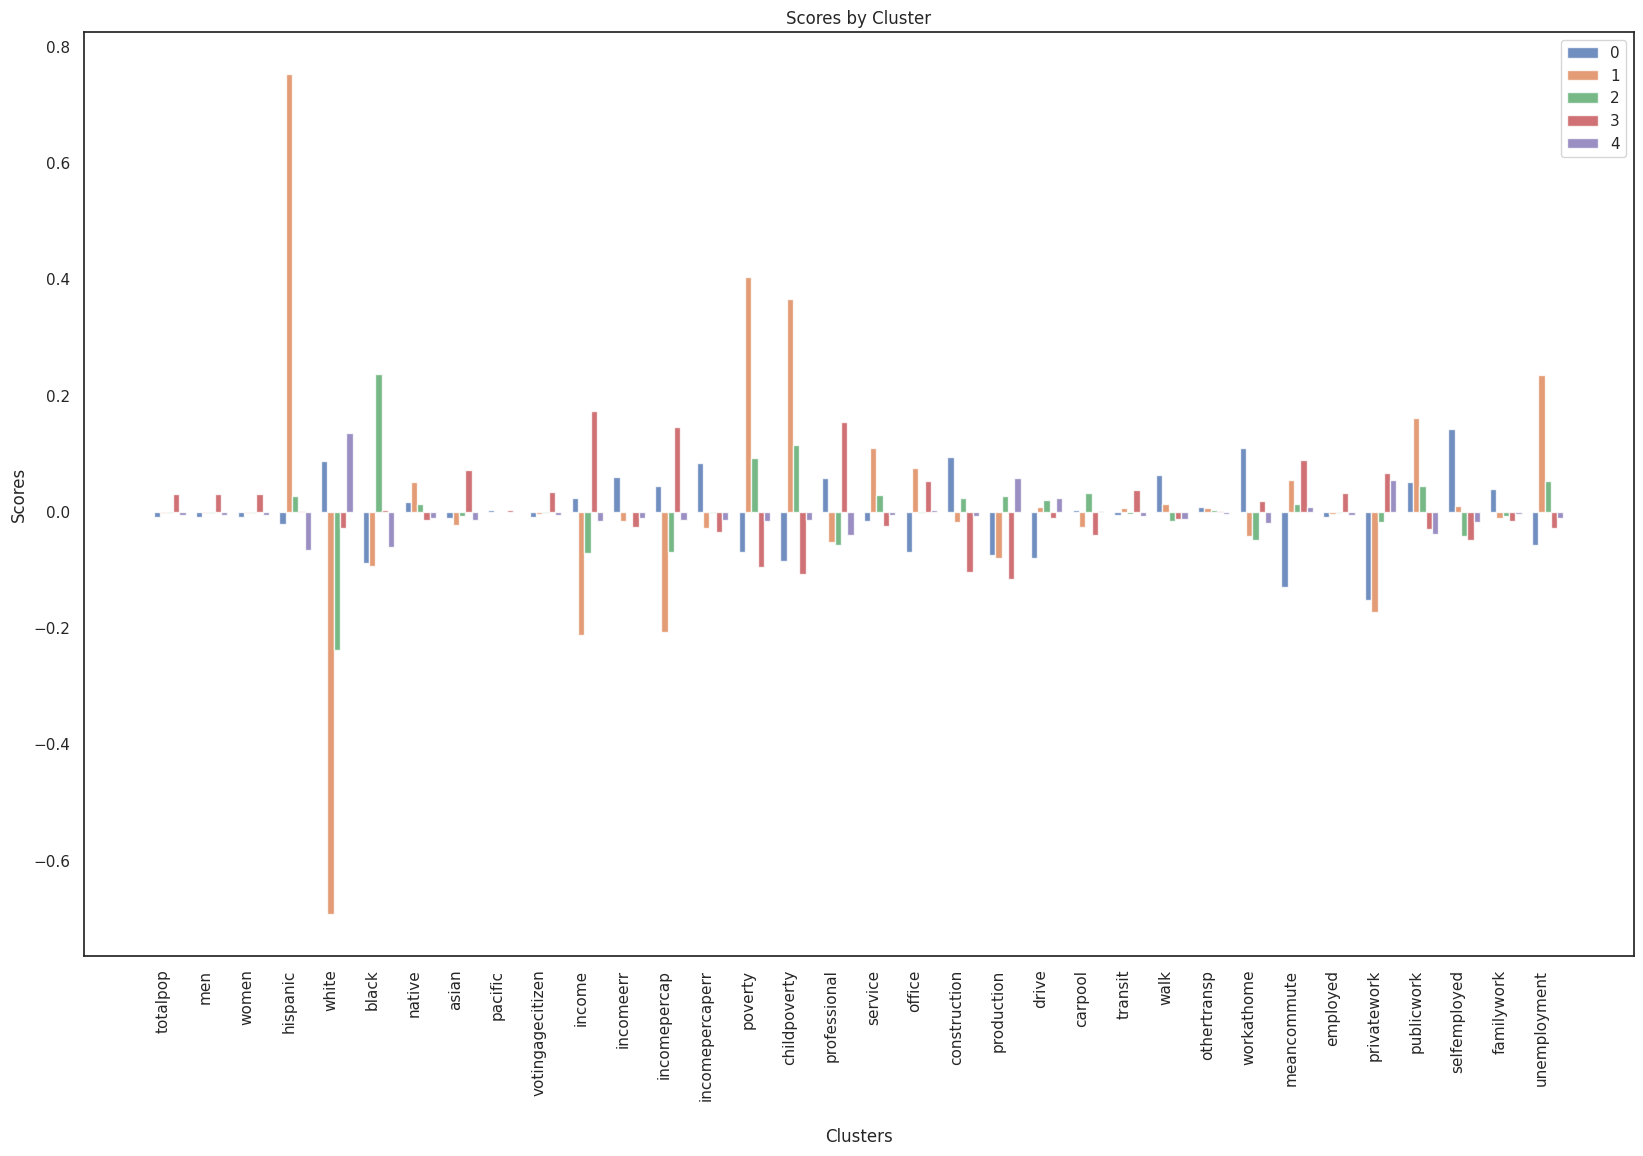

In [30]:
import pylab
from pylab import figure, axes, pie, title, show

# data to plot
n_groups = df_norm_copy.shape[1]-1

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

for i in range(num_clusters):
    plot_it(cluster_means[i], i)

plt.xlabel('Clusters', labelpad=20)
plt.ylabel('Scores')
plt.title('Scores by Cluster')
plt.xticks(index + bar_width, (cluster_means.index.values),rotation='vertical')
plt.legend()

plt.margins(0.05)
fig.set_size_inches(20, 12)
#pylab.savefig('Cluster_results.png')
plt.show()

In [31]:
# remove features that have high scores to better see other features
cluster_means_zoom  = pd.DataFrame(normalized_df_labeled.drop(['white',
                                                             'hispanic']
                                                            , axis=1).groupby(['cluster']).mean())
cluster_means_lim = cluster_means_zoom.T 

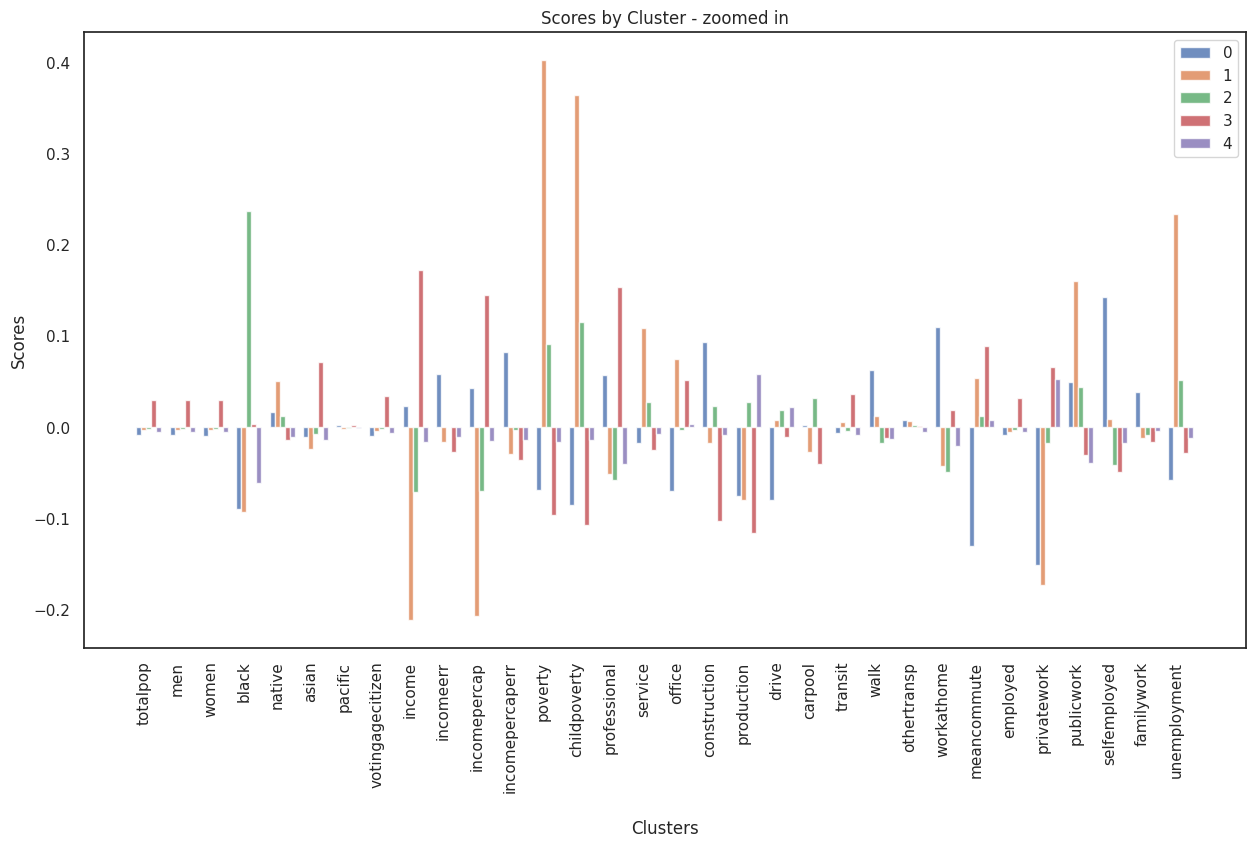

In [32]:
# data to plot
n_groups = cluster_means_zoom.shape[1]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

for i in range(num_clusters):
    plot_it(cluster_means_lim[i], i)

plt.xlabel('Clusters', labelpad=20)
plt.ylabel('Scores')
plt.title('Scores by Cluster - zoomed in')
plt.xticks(index + bar_width, (cluster_means_lim.index.values),rotation='vertical')
plt.legend()

plt.margins(0.05)
fig.set_size_inches(15, 8)
#pylab.savefig('Cluster_results - zoom.png')
plt.show()

In [33]:
## to get minimum distance to centroid user token
from sklearn.metrics import pairwise_distances_argmin_min

df_normalized = df_norm_copy.drop('cluster', axis =1)

closest, _ = pairwise_distances_argmin_min(kmeans_c.cluster_centers_, df_normalized)
counties.iloc[closest]

,state,county
1643,Montana,Sheridan County
2546,Texas,Brooks County
1985,North Carolina,Wayne County
1230,Massachusetts,Worcester County
632,Illinois,Iroquois County


In [34]:
df_norm_copy.iloc[closest]

,totalpop,men,women,hispanic,white,black,native,asian,pacific,votingagecitizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment,cluster
1643,-0.010,-0.010,-0.010,-0.087,0.160,-0.099,-0.004,-0.009,-0.002,-0.011,0.025,0.062,0.113,0.074,-0.073,-0.113,0.082,0.013,0.004,0.055,-0.155,-0.069,-0.015,-0.009,0.074,-0.012,0.111,-0.222,-0.009,-0.107,-0.013,0.177,0.015,-0.097,0
2546,-0.009,-0.009,-0.009,0.828,-0.691,-0.099,-0.020,-0.031,-0.002,-0.011,-0.205,0.003,-0.190,0.009,0.394,0.470,-0.111,0.228,0.007,-0.016,-0.079,0.055,0.012,-0.015,-0.001,-0.037,-0.089,-0.047,-0.009,-0.195,0.169,0.035,-0.035,0.174,1
1985,0.002,0.002,0.002,0.000,-0.208,0.246,-0.016,-0.002,-0.002,0.003,-0.061,-0.041,-0.039,-0.036,0.070,0.136,-0.041,-0.007,0.028,-0.014,0.046,0.015,0.145,-0.009,-0.028,-0.018,-0.080,-0.039,0.001,0.011,0.037,-0.076,0.003,0.074,2
1230,0.071,0.071,0.071,-0.005,0.030,-0.050,-0.017,0.082,-0.002,0.085,0.172,-0.054,0.142,-0.073,-0.090,-0.105,0.177,-0.020,0.019,-0.137,-0.101,0.012,-0.050,0.012,-0.009,-0.002,0.011,0.131,0.076,0.115,-0.069,-0.065,-0.010,-0.014,3
632,-0.007,-0.007,-0.007,-0.047,0.154,-0.087,-0.020,-0.021,-0.002,-0.008,-0.001,-0.022,0.013,-0.036,-0.020,-0.000,-0.045,-0.007,-0.002,0.025,0.042,0.025,-0.022,-0.012,-0.023,0.007,0.008,-0.007,-0.007,0.054,-0.066,0.022,0.015,-0.004,4


In [35]:
## For feature importance selection
from sklearn.ensemble import RandomForestClassifier

for n in range(0, num_clusters):
    features = df_normalized
    clf = RandomForestClassifier(n_jobs=2)
    y, _ = pd.factorize(kmeans_c.labels_ == n)
    fit = clf.fit(features, y)
    fit_df = pd.DataFrame(list(df_normalized.columns.values))
    fit_df['score'] =  fit.feature_importances_
    print(fit_df.sort_values('score', ascending = False).head(5)), '\n'

               0     score
31  selfemployed  0.127210
29   privatework  0.068786
2          women  0.064295
24          walk  0.056321
26    workathome  0.050931
               0     score
3       hispanic  0.265832
4          white  0.192463
12  incomepercap  0.099216
10        income  0.078132
14       poverty  0.072105
               0     score
5          black  0.262829
4          white  0.219585
14       poverty  0.056020
3       hispanic  0.049556
12  incomepercap  0.048743
                   0     score
10            income  0.121341
12      incomepercap  0.108545
16      professional  0.089247
0           totalpop  0.063561
9   votingagecitizen  0.062737
               0     score
4          white  0.213056
20    production  0.094118
29   privatework  0.082188
5          black  0.081740
16  professional  0.058992


In [36]:
## Combine data to export
county_cluster = pd.DataFrame(df2[['state','county']])
county_cluster['cluster'] = kmeans_c.labels_
county_cluster.head()

,state,county,cluster
0,Alabama,Autauga County,4
1,Alabama,Baldwin County,3
2,Alabama,Barbour County,2
3,Alabama,Bibb County,4
4,Alabama,Blount County,4


In [37]:
df_final = pd.merge(county_cluster, df2, left_on =['state','county'], right_on =['state','county'])
print(df_final.shape)
df_final.head()

(3220, 37)


,state,county,cluster,totalpop,men,women,hispanic,white,black,native,asian,pacific,votingagecitizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment
0,Alabama,Autauga County,4,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,Alabama,Baldwin County,3,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,Alabama,Barbour County,2,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,Alabama,Bibb County,4,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,Alabama,Blount County,4,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [38]:
#df_final.to_csv('cluster_dataset.csv',index=False)

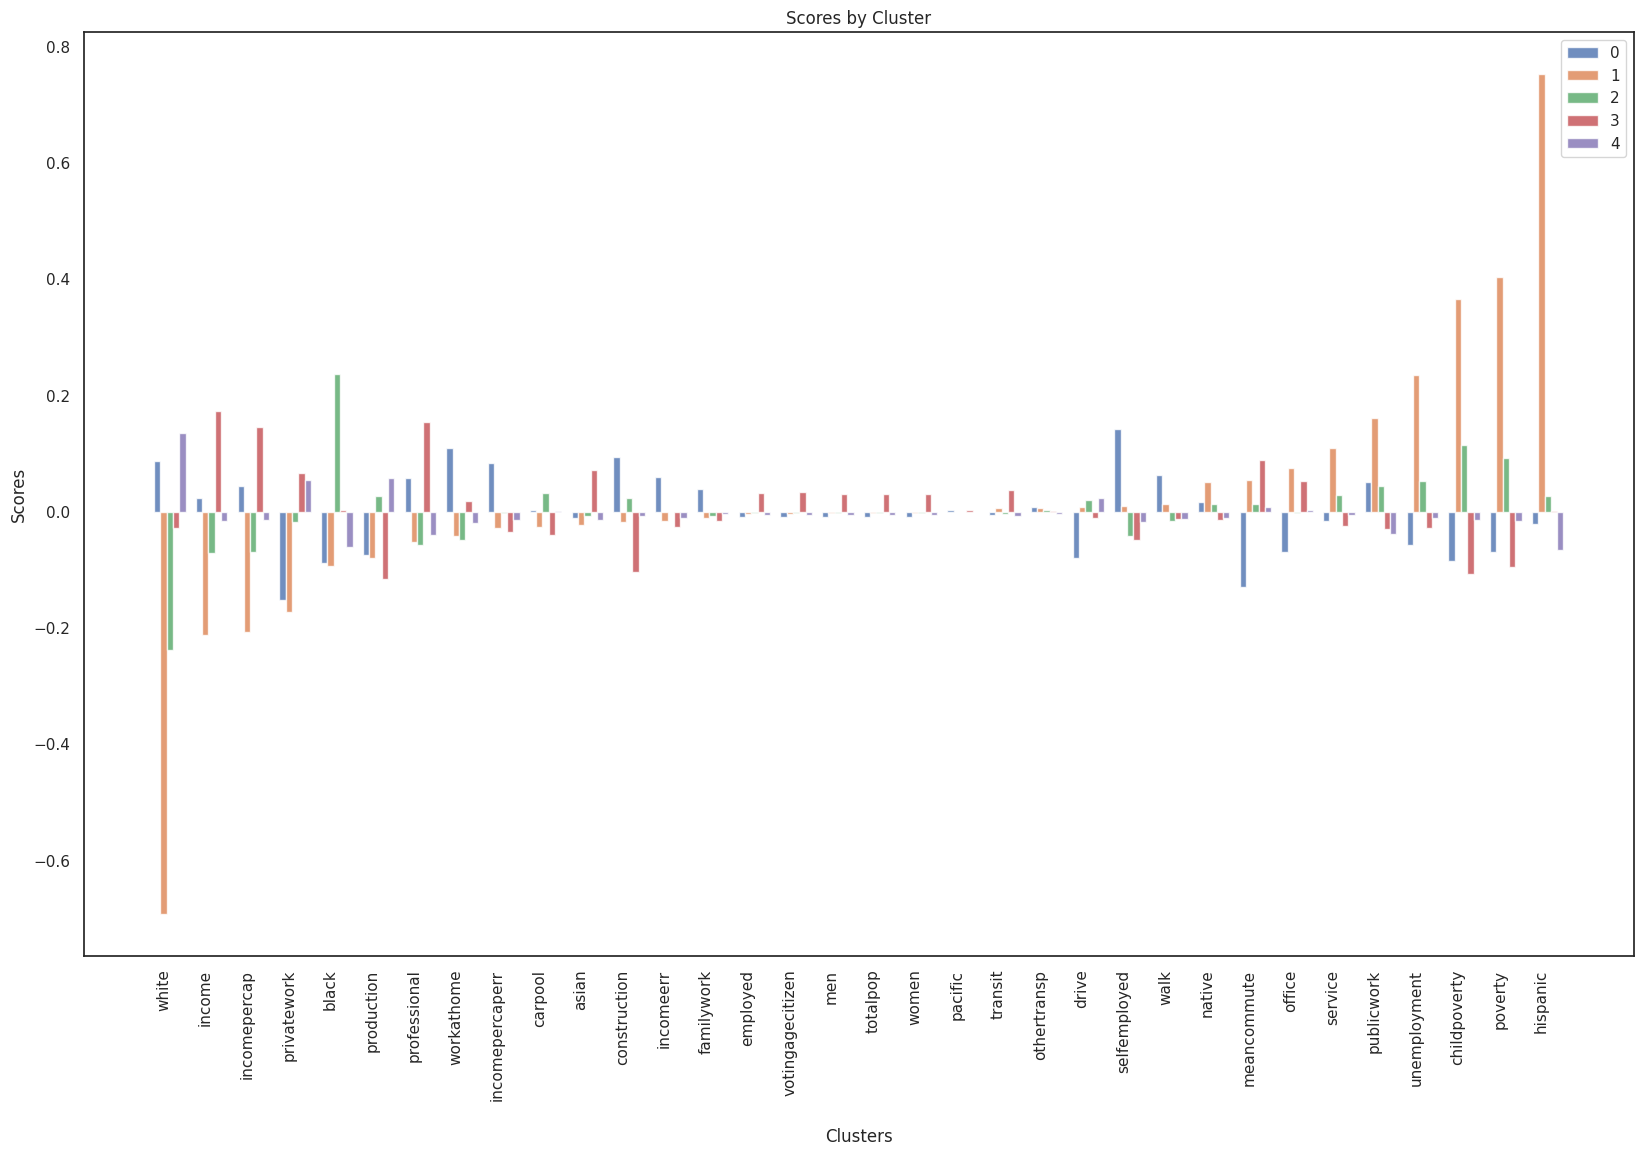

In [42]:
import pylab
from pylab import figure, axes, pie, title, show

# data to plot
n_groups = df_norm_copy.shape[1]-1

clu = cluster_means.sort_values(by=1)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

for i in range(num_clusters):
    plot_it(clu[i], i)

plt.xlabel('Clusters', labelpad=20)
plt.ylabel('Scores')
plt.title('Scores by Cluster')
plt.xticks(index + bar_width, (clu.index.values),rotation='vertical')
plt.legend()

plt.margins(0.05)
fig.set_size_inches(20, 12)
#pylab.savefig('Cluster_results.png')
plt.show()

In [40]:
## Interpretation/Cluster Characteristics (it's best to put the info together in a doc and write up observations):
## We have: table of normalized/original cluster data means + chart above, random forest for categories, example county closest to centroid. 
## We could modify with more clusters, different normalization, mor detail, more data, etc.

# Cluster 0 has most self employed, work at home/shorter commute/walk. little private work, fairly white, construction. Highlight: Sheridan County, Montana
# Cluster 1 has a high hispanic and low white population, low income & high poverty/child poverty/unemployment. Mostly public work. Brooks County, Texas.
# Cluster 2 has a high black population & low white (higher hispanic but not like cluster 1. higher poverty/unemployment+low income (not as bad as cluster 1). Wayne County, North Carolina.
# Cluster 3 has high income/employed/population/asian, professionals, and longer commutes, fewer production/childpoverty/construction/self employment. Worcester County, Massachusetts
# Cluster 4 has a high white population, production, and lower hispanic/black, more private less professional work. Iroquois County, Illinois.

In [41]:
#mean_og.round(2).sort_values(by=1)
cluster_means.round(2).sort_values(by=0)

cluster,0,1,2,3,4
privatework,-0.15,-0.17,-0.02,0.07,0.05
meancommute,-0.13,0.05,0.01,0.09,0.01
black,-0.09,-0.09,0.24,0.00,-0.06
childpoverty,-0.09,0.36,0.12,-0.11,-0.01
drive,-0.08,0.01,0.02,-0.01,0.02
production,-0.07,-0.08,0.03,-0.12,0.06
office,-0.07,0.08,-0.00,0.05,0.00
poverty,-0.07,0.40,0.09,-0.10,-0.02
unemployment,-0.06,0.23,0.05,-0.03,-0.01
hispanic,-0.02,0.75,0.03,0.00,-0.07
